In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

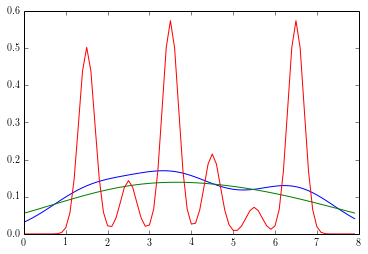

In [3]:
import matplotlib.pyplot as plt
import numpy
from scipy import stats
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
x = numpy.arange(0., 8, .1)
# See http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
plt.plot(x, stats.kde.gaussian_kde(data)(x)) # default bandwidth (scott's rule)
plt.plot(x, stats.kde.gaussian_kde(data,1)(x))
plt.plot(x, stats.kde.gaussian_kde(data,0.1)(x))
plt.show()

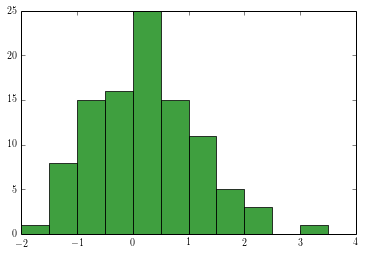

In [4]:
x = np.random.normal(0, 1, 100)
entries, bins, patches = plt.hist(x, 20, range=(-5,5), facecolor='green', alpha=0.75)


In [5]:
fig = plt.figure(figsize=(10,10))

ntot = 100
x = np.random.normal(0, 1, ntot)

# UGLY yrange!

nbin = 20
ymax = ntot/nbin*5
ax = fig.add_subplot(211)
ax.set_xlim([-5,5])
#ax.set_ylim([0,ymax])
n,b,p = ax.hist(x, nbin, range=(-5,5), fc='g', alpha=0.75)

nbin = 100
ymax = ntot/nbin*5
ax = fig.add_subplot(212)
ax.set_xlim([-5,5])
#ax.set_ylim([0,ymax])
n,b,p = ax.hist(x, nbin, range=(-5,5), fc='g', alpha=0.75)


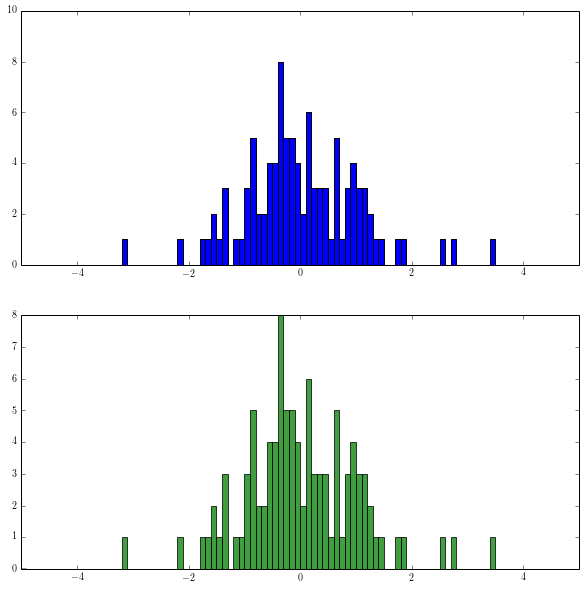

In [6]:
# See http://stackoverflow.com/questions/12283921/matplotlib-normed-histograms

fig = plt.figure(figsize=(10,10))

ntot = 100
x = np.random.normal(0, 1, ntot)

xmin=-5.
xmax=5.

nbin = 100

ax = fig.add_subplot(211)
ax.set_xlim([xmin,xmax])
binw = (xmax-xmin)/nbin
hist = np.histogram(x, bins=np.arange(xmin,xmax+binw,binw))
###print hist[0].max()
ax.set_ylim([0,int(hist[0].max()*1.2+1)])
###print hist
bar = ax.bar(hist[1][:-1], hist[0], width=binw)
###print len(hist[1]) # nbin+1
###print len(hist[1][:-1]) # nbin
###print len(hist[0]) # nbin

ax = fig.add_subplot(212)
ax.set_xlim([xmin,xmax])
###ymax = ntot/nbin*5
###ax.set_ylim([0,ymax])
hist = ax.hist(x, nbin, range=(xmin,xmax), fc='g', alpha=0.75)
###print hist


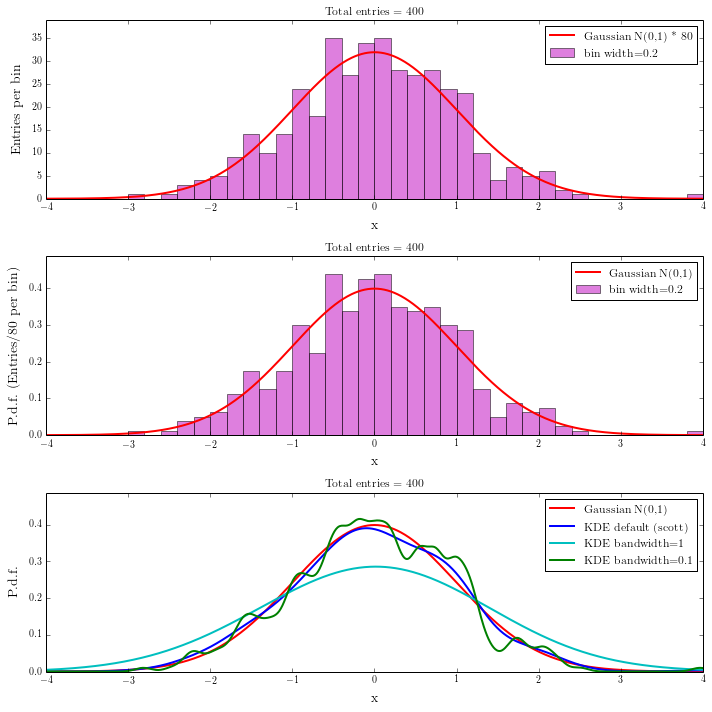

In [9]:
from scipy.stats import norm

# See http://stackoverflow.com/questions/12283921/matplotlib-normed-histograms

fig = plt.figure(figsize=(10,10))

ntot = 400
data = np.random.normal(0, 1, ntot)

xmin=-4.
xmax=4.

x = np.arange(xmin,xmax,0.01)

nbin = 40
binw = (xmax-xmin)/nbin

ax = fig.add_subplot(311)
ax.set_xlim([xmin,xmax])
hist = np.histogram(data, bins=np.arange(xmin,xmax+binw,binw))
ymax = int(hist[0].max()*1.1+1)
ax.set_ylim([0,ymax])
bar = ax.bar(hist[1][:-1], hist[0], width=binw, fc='m', alpha=0.5, label='bin width='+str(binw))
ax.plot(x, ntot*binw*norm.pdf(x), '-r', lw=2, alpha=1, label='Gaussian N(0,1) * '+str(int(ntot*binw)))
ax.set_xlabel('x', labelpad=8, fontsize=14)
ax.set_ylabel('Entries per bin', labelpad=8, fontsize=14)
ax.set_title('Total entries = '+str(ntot))
ax.legend(loc='best', frameon=True, numpoints=1)

ax = fig.add_subplot(312)
ax.set_xlim([xmin,xmax])
hist = np.histogram(data, bins=np.arange(xmin,xmax+binw,binw))
ax.set_ylim([0,ymax/(ntot*binw)])
bar = ax.bar(hist[1][:-1], hist[0]/(ntot*binw), width=binw, fc='m', alpha=0.5, label='bin width='+str(binw))
ax.plot(x, norm.pdf(x), '-r', lw=2, alpha=1, label='Gaussian N(0,1)')
ax.set_xlabel('x', labelpad=8, fontsize=14)
ax.set_ylabel('P.d.f. (Entries/'+str(int(ntot*binw))+' per bin)', labelpad=8, fontsize=14)
ax.set_title('Total entries = '+str(ntot))
ax.legend(loc='best', frameon=True, numpoints=1)

ax = fig.add_subplot(313)
ax.set_ylim([0,ymax/(ntot*binw)])
# See http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
ax.plot(x, norm.pdf(x), '-r', lw=2, alpha=1, label='Gaussian N(0,1)')
ax.plot(x, stats.kde.gaussian_kde(data)(x), '-b', lw=2, label='KDE default (scott)') # default bandwidth (scott's rule)
###ax.plot(x, stats.kde.gaussian_kde(data,2)(x), '-k', lw=2, label='KDE bandwidth=2')
ax.plot(x, stats.kde.gaussian_kde(data,1)(x), '-c', lw=2, label='KDE bandwidth=1')
###ax.plot(x, stats.kde.gaussian_kde(data,binw)(x), '-y', lw=2, label='KDE bandwidth='+str(binw))
ax.plot(x, stats.kde.gaussian_kde(data,0.1)(x), '-g', lw=2, label='KDE bandwidth=0.1')
ax.set_xlabel('x', labelpad=8, fontsize=14)
ax.set_ylabel('P.d.f.', labelpad=8, fontsize=14)
ax.set_title('Total entries = '+str(ntot))
ax.legend(loc='best', frameon=True, numpoints=1)

plt.tight_layout()
###plt.savefig('WA_AV003_plot1_kdes.png',dpi=600)